<a href="https://colab.research.google.com/github/chandini2595/CMPE255_Assignment3/blob/main/Pycaret_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 85.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This 

In [2]:
from pycaret.datasets import get_data
data = get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
from pycaret.regression import *
s = setup(data, target = 'medv', session_id = 123)

,Description,Value
0,Session id,123
1,Target,medv
2,Target type,Regression
3,Original data shape,"(506, 14)"
4,Transformed data shape,"(506, 14)"
5,Transformed train set shape,"(354, 14)"
6,Transformed test set shape,"(152, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [4]:
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [5]:
type(exp)

pycaret.regression.oop.RegressionExperiment

In [6]:
exp.setup(data, target = 'medv', session_id = 123)

,Description,Value
0,Session id,123
1,Target,medv
2,Target type,Regression
3,Original data shape,"(506, 14)"
4,Transformed data shape,"(506, 14)"
5,Transformed train set shape,"(354, 14)"
6,Transformed test set shape,"(152, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [7]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0378,9.4958,2.9283,0.8884,0.1298,0.1000,0.2040
catboost,CatBoost Regressor,2.0312,9.5883,2.9869,0.8860,0.1362,0.1015,3.6910
gbr,Gradient Boosting Regressor,2.1748,9.6803,3.0274,0.8788,0.1434,0.1117,0.1590
rf,Random Forest Regressor,2.2316,10.6310,3.1448,0.8673,0.1447,0.1129,0.3680
lightgbm,Light Gradient Boosting Machine,2.3305,11.5722,3.2969,0.8566,0.1482,0.1157,0.3150
xgboost,Extreme Gradient Boosting,2.4154,12.5225,3.4385,0.8452,0.1539,0.1196,0.2720
ada,AdaBoost Regressor,2.8789,15.9344,3.8667,0.8055,0.1803,0.1517,0.1160
dt,Decision Tree Regressor,2.9307,19.6150,4.2538,0.7368,0.1909,0.1455,0.0260
ridge,Ridge Regression,3.2793,22.8402,4.6440,0.7300,0.2460,0.1664,0.0270
lr,Linear Regression,3.3006,22.7209,4.6402,0.7295,0.2526,0.1668,0.6190


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [8]:
best = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2919,9.6775,3.1109,0.8917,0.1208,0.0868
1,1.6188,4.4207,2.1025,0.9045,0.1041,0.0854
2,2.2188,8.2327,2.8693,0.9178,0.1541,0.1300
3,2.5955,20.0783,4.4809,0.8020,0.1761,0.1313
4,1.7785,6.0625,2.4622,0.9486,0.1273,0.0922
5,1.8834,6.9000,2.6268,0.8716,0.1389,0.1028
6,1.8945,7.0188,2.6493,0.8960,0.1351,0.0976
7,2.4925,21.0920,4.5926,0.8065,0.1576,0.1058
8,1.8299,5.6321,2.3732,0.8993,0.1364,0.1079


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

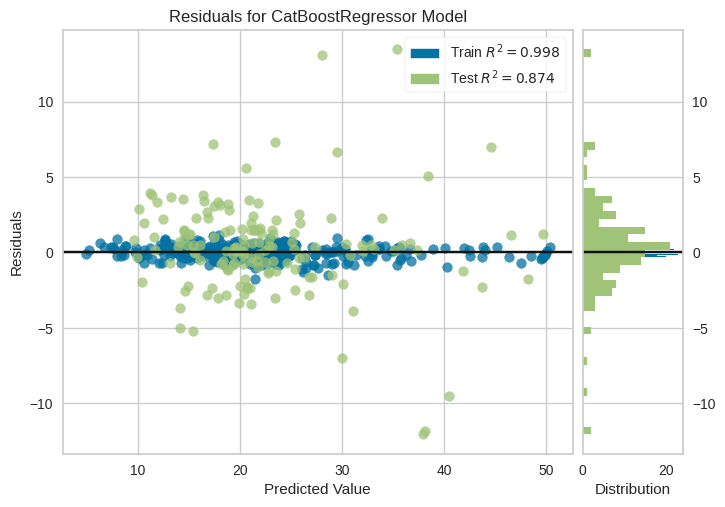

In [9]:
plot_model(best, plot = 'residuals')

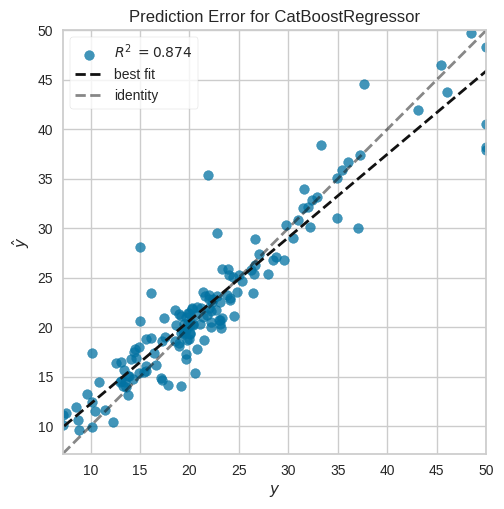

In [10]:
plot_model(best, plot = 'error')

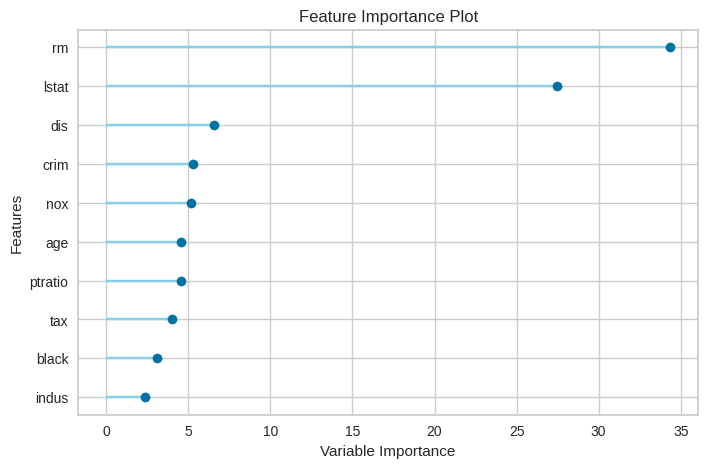

In [11]:
plot_model(best, plot = 'feature')

In [12]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [15]:
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,2.1028,10.2235,3.1974,0.8735,0.1446,0.1126


In [16]:
holdout_pred.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,prediction_label
410,51.135799,0.0,18.10,0,0.5970,5.757,100.000000,1.4130,24,666,20.200001,2.600000,10.11,15.000000,28.073225
85,0.057350,0.0,4.49,0,0.4490,6.630,56.099998,4.4377,3,247,18.500000,392.299988,6.53,26.600000,26.275600
280,0.035780,20.0,3.33,0,0.4429,7.820,64.500000,4.6947,5,216,14.900000,387.309998,3.76,45.400002,46.528549
422,12.048200,0.0,18.10,0,0.6140,5.648,87.599998,1.9512,24,666,20.200001,291.549988,14.10,20.799999,17.814936
199,0.031500,95.0,1.47,0,0.4030,6.975,15.300000,7.6534,3,402,17.000000,396.899994,4.56,34.900002,31.027655


In [17]:
new_data = data.copy()
new_data.drop('medv', axis=1, inplace=True)
new_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [18]:
predictions = predict_model(best, data = new_data)
predictions.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,prediction_label
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,25.292275
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.449788
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.819861
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.627699
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,35.709245


In [19]:
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['crim', 'zn', 'indus', 'chas',
                                              'nox', 'rm', 'age', 'dis', 'rad',
                                              'tax', 'ptratio', 'black',
                                              'lstat'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x7c1c7a9cb220>)]),
 'my_first_pipeline.pkl')

In [20]:
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['crim', 'zn', 'indus', 'chas',
                                             'nox', 'rm', 'age', 'dis', 'rad',
                                             'tax', 'ptratio', 'black',
                                             'lstat'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7c1c7a5a4fd0>)])